# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exponential-growth" data-toc-modified-id="Exponential-growth-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exponential growth</a></div><div class="lev2 toc-item"><a href="#ERY" data-toc-modified-id="ERY-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ERY</a></div><div class="lev2 toc-item"><a href="#PAR" data-toc-modified-id="PAR-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PAR</a></div><div class="lev1 toc-item"><a href="#Two-epoch-model" data-toc-modified-id="Two-epoch-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two epoch model</a></div><div class="lev2 toc-item"><a href="#ERY" data-toc-modified-id="ERY-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ERY</a></div><div class="lev2 toc-item"><a href="#PAR" data-toc-modified-id="PAR-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>PAR</a></div><div class="lev1 toc-item"><a href="#Bottlegrowth" data-toc-modified-id="Bottlegrowth-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bottlegrowth</a></div><div class="lev2 toc-item"><a href="#ERY" data-toc-modified-id="ERY-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ERY</a></div><div class="lev3 toc-item"><a href="#Interpretation" data-toc-modified-id="Interpretation-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Interpretation</a></div><div class="lev2 toc-item"><a href="#PAR" data-toc-modified-id="PAR-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>PAR</a></div><div class="lev3 toc-item"><a href="#Interpretation" data-toc-modified-id="Interpretation-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Interpretation</a></div><div class="lev1 toc-item"><a href="#Three-Epoch" data-toc-modified-id="Three-Epoch-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Three Epoch</a></div><div class="lev2 toc-item"><a href="#ERY" data-toc-modified-id="ERY-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ERY</a></div><div class="lev3 toc-item"><a href="#Interpretation" data-toc-modified-id="Interpretation-411"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Interpretation</a></div><div class="lev2 toc-item"><a href="#PAR" data-toc-modified-id="PAR-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PAR</a></div>

In [2]:
from ipyparallel import Client

cl = Client()

cl.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
%%px --local

# run whole cell on all engines a well as in the local IPython session

import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

error in importing Two Locus modules
[stdout:0] error in importing Two Locus modules
[stdout:1] error in importing Two Locus modules
[stdout:2] error in importing Two Locus modules
[stdout:3] error in importing Two Locus modules
[stdout:4] error in importing Two Locus modules
[stdout:5] error in importing Two Locus modules
[stdout:6] error in importing Two Locus modules
[stdout:7] error in importing Two Locus modules
[stdout:8] error in importing Two Locus modules
[stdout:9] error in importing Two Locus modules
[stdout:10] error in importing Two Locus modules
[stdout:11] error in importing Two Locus modules
[stdout:12] error in importing Two Locus modules
[stdout:13] error in importing Two Locus modules
[stdout:14] error in importing Two Locus modules
[stdout:15] error in importing Two Locus modules
[stdout:16] error in importing Two Locus modules
[stdout:17] error in importing Two Locus modules
[stdout:18] error in importing Two Locus modules
[stdout:19] error in importing Two Locus m

In [4]:
%%px --local

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('ERY_modified.sfs')

# import 1D spectrum of par on all engines:
fs_par = dadi.Spectrum.from_file('PAR_modified.sfs')

In [5]:
%matplotlib inline

import pylab

pylab.rcParams['figure.figsize'] = [12, 10]
pylab.rcParams['font.size'] = 14

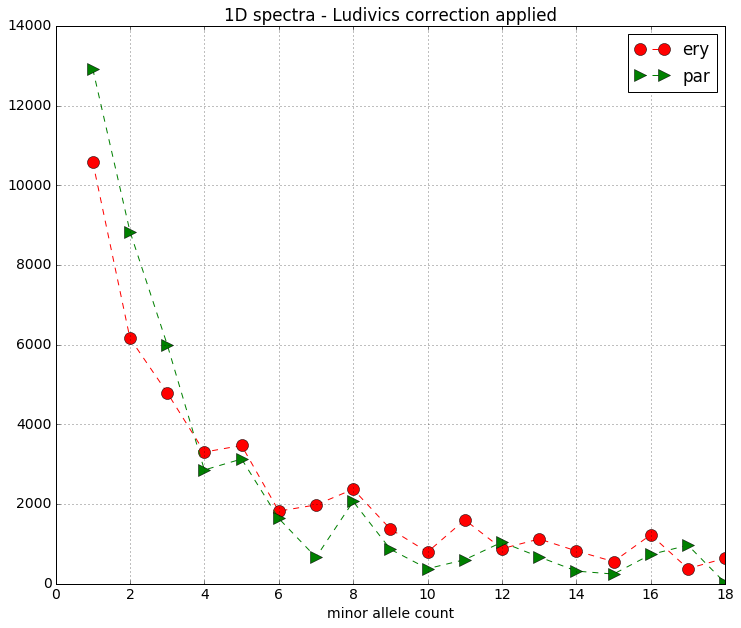

In [5]:
pylab.plot(fs_ery, 'ro--', label='ery', markersize=12)
pylab.plot(fs_par, 'g>--', label='par', markersize=12)
pylab.grid()
pylab.xlabel('minor allele count')
pylab.ylabel('')
pylab.legend()
pylab.title('1D spectra - Ludivics correction applied')

In [6]:
def run_dadi(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    if perturb == True:
        p_init = dadi.Misc.perturb_params(p_init, fold=fold, 
                                      upper_bound=upper_bound, lower_bound=lower_bound)
        # note upper_bound and lower_bound variables are expected to be in the namespace of each engine
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p_init, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=verbose, maxiter=maxiter, full_output=full_output, \
                                    fixed_params=fixed_params)
    # pickle to file
    import dill
    name = outname[:] # make copy of file name stub!
    for p in p_init:
        name += "_%.4f" % (p)
    with open(name + ".dill", "w") as fh:
        dill.dump((p_init, popt), fh)
    
    return p_init, popt

In [7]:
from glob import glob
import dill
from utility_functions import *
import pandas as pd

In [8]:
lbview = cl.load_balanced_view()

In [9]:
from itertools import repeat

# Exponential growth

In [10]:
dadi.Demographics1D.growth?

In [7]:
%%px --local

func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics1D.growth)

In [8]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 4]
lower_bound = [1e-4, 0]

## ERY

In [9]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_ery
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 300 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/expgrowth" # set file name stub for opt. result files
fixed_params = None

In [26]:
# set starting values for perturbation
p0 = [1, 1]

#ar_ery = lbview.map(run_dadi, repeat(p0, 10))

In [27]:
ar_ery.get()

[(array([ 0.52159134,  1.74938445]),
  (array([ 1.92496546,  3.99999363]), 1360.5432242843067, 53, 104, 0)),
 (array([ 1.45398757,  1.30117367]),
  (array([ 1.92587396,  3.9999491 ]), 1360.5429385643959, 49, 95, 0)),
 (array([ 2.87294249,  0.80496125]),
  (array([ 1.93321694,  3.99999797]), 1360.5515421579898, 73, 144, 0)),
 (array([ 0.61616358,  1.12137011]),
  (array([ 1.92623376,  3.99999922]), 1360.5428169646591, 84, 154, 0)),
 (array([ 0.96154366,  1.92512836]),
  (array([ 1.92638011,  3.99999236]), 1360.5428195065892, 90, 163, 0)),
 (array([ 0.89720055,  2.0181116 ]),
  (array([ 1.92640325,  3.9999859 ]), 1360.5428283098793, 68, 129, 0)),
 (array([ 2.27626898,  0.72898626]),
  (array([ 1.92640879,  3.99999571]), 1360.5428142889377, 76, 142, 0)),
 (array([ 0.72462353,  3.69678385]),
  (array([ 1.92630161,  3.99999829]), 1360.5428139422156, 71, 131, 0)),
 (array([ 1.17724551,  0.71113477]),
  (array([ 1.92620465,  3.99999854]), 1360.5428203196425, 64, 125, 0)),
 (array([ 0.84373556

In [28]:
# set starting values for perturbation
p0 = [0.1, 0.1]

#ar_ery = lbview.map(run_dadi, repeat(p0, 10))

In [31]:
# set starting values for perturbation
p0 = [10, 0.1]

#ar_ery1 = lbview.map(run_dadi, repeat(p0, 10))

In [32]:
ar_ery = []

for filename in glob("OUT_1D_models/expgrowth*dill"):
    ar_ery.append(dill.load(open(filename)))

In [33]:
get_flag_count(ar_ery, NM=True)

success 26
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 3
unknown flag 0


In [15]:
import pandas as pd

In [36]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nu1_0,T_0,nu1_opt,T_opt,-logL
9,0.724624,3.696784,1.926302,3.999998e+00,1360.542814
5,2.276269,0.728986,1.926409,3.999996e+00,1360.542814
26,0.843736,0.351772,1.926489,3.999995e+00,1360.542816
10,0.616164,1.121370,1.926234,3.999999e+00,1360.542817
1,0.961544,1.925128,1.926380,3.999992e+00,1360.542820
2,7.627865,0.385429,1.926515,3.999993e+00,1360.542820
20,0.301447,0.332010,1.926412,3.999992e+00,1360.542820
21,1.177246,0.711135,1.926205,3.999999e+00,1360.542820
7,0.337952,0.210482,1.926483,3.999990e+00,1360.542822
22,0.897201,2.018112,1.926403,3.999986e+00,1360.542828


In [ ]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 6] # increasing upper bound of time parameter
lower_bound = [1e-4, 0]

In [13]:
# set starting values for perturbation
p0 = [2, 1]

#ar_ery1 = lbview.map(run_dadi, repeat(p0, 10))

In [11]:
ar_ery = []

for filename in glob("OUT_1D_models/expgrowth*dill"):
    ar_ery.append(dill.load(open(filename)))

In [16]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nu1_0,T_0,nu1_opt,T_opt,-logL
25,0.667023,1.441354,1.926420,3.999999e+00,1360.542810
19,6.772647,0.858149,1.926552,3.999999e+00,1360.542811
15,4.183154,0.473458,1.926500,3.999997e+00,1360.542813
12,0.724624,3.696784,1.926302,3.999998e+00,1360.542814
5,2.276269,0.728986,1.926409,3.999996e+00,1360.542814
20,1.396750,2.901211,1.926386,3.999996e+00,1360.542815
35,0.843736,0.351772,1.926489,3.999995e+00,1360.542816
13,0.616164,1.121370,1.926234,3.999999e+00,1360.542817
6,0.773136,0.484381,1.926645,3.999999e+00,1360.542817
1,0.961544,1.925128,1.926380,3.999992e+00,1360.542820


In [19]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 8] # increasing upper bound of time parameter
lower_bound = [1e-4, 0]

In [20]:
# set starting values for perturbation
p0 = [2, 1]

ar_ery1 = lbview.map(run_dadi, repeat(p0, 10))

In [21]:
ar_ery = []

for filename in glob("OUT_1D_models/expgrowth*dill"):
    ar_ery.append(dill.load(open(filename)))

In [23]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(15)

,nu1_0,T_0,nu1_opt,T_opt,-logL
2,1.611345,0.416388,2.595470,7.999989,1358.866673
12,5.348335,0.981125,2.595507,7.999982,1358.866673
48,4.749580,0.328315,2.595214,7.999994,1358.866677
19,1.318997,1.017943,2.595547,7.999912,1358.866678
38,6.321711,2.346334,2.595702,7.999955,1358.866678
1,3.592390,3.075446,2.595296,7.999918,1358.866679
17,4.503621,3.660584,2.595587,7.999892,1358.866680
24,4.025450,2.382271,2.595861,7.999981,1358.866683
9,2.145898,0.994494,2.595144,7.999768,1358.866694
4,5.225548,0.508549,2.596269,7.999986,1358.866716


The time parameter is hitting the upper boundary that I set. The exponential growth model cannot be fit to the ery spectrum with Ludovics correction applied.

## PAR

In [24]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_par
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 300 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/PAR_expgrowth" # set file name stub for opt. result files
fixed_params = None

In [25]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 4]
lower_bound = [1e-4, 0]

In [26]:
# set starting values for perturbation
p0 = [1, 1]

ar_par = lbview.map(run_dadi, repeat(p0, 10))

In [27]:
ar_par = []

for filename in glob("OUT_1D_models/PAR_expgrowth*dill"):
    ar_par.append(dill.load(open(filename)))

In [28]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_par]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(15)

,nu1_0,T_0,nu1_opt,T_opt,-logL
5,0.684280,0.790257,5.829353,4.000000,2608.698563
9,0.325571,0.945836,5.829458,4.000000,2608.698569
4,0.443137,1.036269,5.828913,3.999999,2608.698570
6,1.789152,1.740486,5.828722,3.999999,2608.698572
0,0.593348,0.253756,5.828885,3.999999,2608.698574
7,1.160380,3.008343,5.829244,3.999998,2608.698590
3,3.994092,0.842870,5.827708,3.999999,2608.698654
2,1.154341,0.457420,5.827902,3.999996,2608.698670
1,1.286207,0.336192,5.833866,3.999998,2608.699591
8,1.410706,0.469832,5.788959,3.999998,2608.767718


In [29]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 8]
lower_bound = [1e-4, 0]

In [30]:
# set starting values for perturbation
p0 = [1, 1]

ar_par = lbview.map(run_dadi, repeat(p0, 10))

In [31]:
ar_par = []

for filename in glob("OUT_1D_models/PAR_expgrowth*dill"):
    ar_par.append(dill.load(open(filename)))

In [32]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_par]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(15)

,nu1_0,T_0,nu1_opt,T_opt,-logL
15,0.750830,0.604793,9.023500,8.000000,2590.605330
7,1.062531,0.633418,9.023736,7.999990,2590.605340
17,3.034756,0.655172,9.023509,7.999984,2590.605345
12,2.252187,0.250914,9.024412,7.999992,2590.605351
8,0.634126,0.414209,9.022813,7.999988,2590.605354
2,1.201925,0.450143,9.023477,7.999969,2590.605359
10,2.903700,0.658733,9.023721,7.999963,2590.605364
6,1.255426,2.350910,9.024275,7.999970,2590.605369
4,1.315136,1.224712,9.025533,7.999987,2590.605425
3,0.320648,0.729121,9.025675,7.999893,2590.605539


The time parameter is hitting the upper boundary that I set. The exponential growth model can therefore not be fit to the PAR spectrum with Ludovic's correction applied.

# Two epoch model

In [33]:
dadi.Demographics1D.two_epoch?

In [34]:
%%px --local

func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics1D.two_epoch)

In [35]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 4]
lower_bound = [1e-4, 0]

## ERY

In [36]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_ery
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 100 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/ERY_twoEpoch" # set file name stub for opt. result files
fixed_params = None

In [37]:
# set starting values for perturbation
p0 = [1, 1]

ar_ery = lbview.map(run_dadi, repeat(p0, 10))

In [38]:
ar_ery = []

for filename in glob("OUT_1D_models/ERY_twoEpoch*dill"):
    ar_ery.append(dill.load(open(filename)))

In [39]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nu1_0,T_0,nu1_opt,T_opt,-logL
9,1.271687,0.453337,3.284710,3.999992,1291.080993
8,0.786023,1.982063,3.284747,3.999980,1291.080997
3,1.812256,2.827430,3.285199,3.999989,1291.081010
2,3.243301,2.375550,3.284132,3.999877,1291.081065
4,2.995061,0.753789,3.286399,3.999942,1291.081264
7,0.537143,1.961470,0.003157,0.810878,1545.562734
0,0.324370,0.296322,0.087663,3.872131,1545.562734
6,0.376569,0.538213,0.062735,3.052372,1545.562734
5,0.517336,0.775456,0.084009,3.921023,1545.562734
1,0.272599,1.006812,0.002458,1.012427,1545.562734


In [40]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 8]
lower_bound = [1e-4, 0]

In [41]:
# set starting values for perturbation
p0 = [1, 1]

ar_ery = lbview.map(run_dadi, repeat(p0, 10))

In [42]:
ar_ery = []

for filename in glob("OUT_1D_models/ERY_twoEpoch*dill"):
    ar_ery.append(dill.load(open(filename)))

In [43]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nu1_0,T_0,nu1_opt,T_opt,-logL
11,1.970211,2.840472,5.763344,7.999975,1290.562871
3,1.342949,2.521405,5.763247,7.999929,1290.562871
0,0.388676,0.268685,5.762843,7.999631,1290.562882
17,0.510905,0.258831,5.762706,7.999600,1290.562883
4,0.463239,0.290241,5.762668,7.999105,1290.562907
14,1.736156,2.808300,5.761851,7.998640,1290.562927
19,1.271687,0.453337,3.284710,3.999992,1291.080993
18,0.786023,1.982063,3.284747,3.999980,1291.080997
8,1.812256,2.827430,3.285199,3.999989,1291.081010
7,3.243301,2.375550,3.284132,3.999877,1291.081065


Still hitting upper boundary on time. The two epoch model cannot be fit to the ERY spectrum with Ludovic's correction applied.

## PAR

In [44]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_par
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 100 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/PAR_twoEpoch" # set file name stub for opt. result files
fixed_params = None

In [45]:
p0 = [1, 1]

ar_par = lbview.map(run_dadi, repeat(p0, 10))

In [50]:
ar_par = []

for filename in glob("OUT_1D_models/PAR_twoEpoch*dill"):
    ar_par.append(dill.load(open(filename)))

In [51]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_par]

df = pd.DataFrame(data=returned, \
                  columns=['nu1_0', 'T_0', 'nu1_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nu1_0,T_0,nu1_opt,T_opt,-logL
8,1.445668,0.984384,13.467983,7.999996,2217.870101
2,0.652365,0.250479,13.468268,7.999992,2217.870108
3,3.197725,0.286029,13.468792,7.999991,2217.870123
9,1.245604,2.590266,13.468550,7.999983,2217.870123
7,0.682977,1.244737,13.467029,7.999973,2217.870140
1,1.173516,0.409266,13.469081,7.999985,2217.870141
0,0.606030,1.077327,13.468892,7.999943,2217.870180
6,0.373660,0.276853,13.466602,7.999937,2217.870195
4,0.767319,0.749924,13.470858,8.000000,2217.870275
5,0.812236,0.517151,13.544442,7.999994,2217.987144


All hitting the upper boundary on the time parameter. The two epoch model cannot be fit to the PAR spectrum with Ludovic's correction applied.

# Bottlegrowth

In [52]:
dadi.Demographics1D.bottlegrowth?

In [17]:
%%px --local

func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics1D.bottlegrowth)

In [8]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 1e4, 8]
lower_bound = [1e-4, 1e-4, 0]

## ERY

In [18]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_ery
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 100 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/ERY_bottlegrowth" # set file name stub for opt. result files
fixed_params = None

In [12]:
# set starting values for perturbation
p0 = [1, 1, 1]

#ar_ery = lbview.map(run_dadi, repeat(p0, 10))

In [10]:
ar_ery = []

for filename in glob("OUT_1D_models/ERY_bottlegrowth*dill"):
    ar_ery.append(dill.load(open(filename)))

In [13]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nuB_0', 'nuF_0', 'T_0', 'nuB_opt', 'nuF_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nuB_0,nuF_0,T_0,nuB_opt,nuF_opt,T_opt,-logL
14,29.669740,1.509297,1.262880,55.031965,1.336215,1.564079,912.527406
17,18.901053,1.355082,0.818211,55.033539,1.336197,1.564061,912.527406
9,2.231703,2.686823,0.741806,55.034594,1.336225,1.564110,912.527406
15,1.844542,1.998676,2.121056,55.036046,1.336280,1.564204,912.527406
11,42.488349,2.416133,1.289042,55.031888,1.336344,1.564299,912.527407
3,59.246560,2.099243,4.860007,54.810303,1.333930,1.559057,912.527640
8,1.990664,0.883324,1.246274,55.219004,1.337293,1.566400,912.527722
10,2.000853,3.618119,1.370990,54.618201,1.329685,1.552250,912.528815
0,18.158202,4.370408,2.455093,54.793120,1.317301,1.533771,912.531271
4,26.624537,1.153500,1.563415,54.674932,1.317636,1.530875,912.534214


In [10]:
# set starting values for perturbation
p0 = [55, 1.3, 1.5]

#ar_ery = lbview.map(run_dadi, repeat(p0, 10))

In [47]:
ar_ery = []

for filename in glob("OUT_1D_models/ERY_bottlegrowth*dill"):
    ar_ery.append(dill.load(open(filename)))

In [48]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nuB_0', 'nuF_0', 'T_0', 'nuB_opt', 'nuF_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nuB_0,nuF_0,T_0,nuB_opt,nuF_opt,T_opt,-logL
14,29.669740,1.509297,1.262880,55.031965,1.336215,1.564079,912.527406
17,18.901053,1.355082,0.818211,55.033539,1.336197,1.564061,912.527406
9,2.231703,2.686823,0.741806,55.034594,1.336225,1.564110,912.527406
15,1.844542,1.998676,2.121056,55.036046,1.336280,1.564204,912.527406
11,42.488349,2.416133,1.289042,55.031888,1.336344,1.564299,912.527407
3,59.246560,2.099243,4.860007,54.810303,1.333930,1.559057,912.527640
8,1.990664,0.883324,1.246274,55.219004,1.337293,1.566400,912.527722
10,2.000853,3.618119,1.370990,54.618201,1.329685,1.552250,912.528815
0,18.158202,4.370408,2.455093,54.793120,1.317301,1.533771,912.531271
4,26.624537,1.153500,1.563415,54.674932,1.317636,1.530875,912.534214


This looks like convergence.

### Interpretation

In [49]:
popt = np.array( df.sort_values(by='-logL', ascending=True).iloc[0, 3:6] )
popt

array([ 55.03196456,   1.33621505,   1.56407868])

In [50]:
# calculate best-fit model spectrum

model_spectrum = func_ex(popt, ns, pts_l)

In [51]:
theta = dadi.Inference.optimal_sfs_scaling(model_spectrum, fs_ery)

In [52]:
mu = 3e-9
L = fs_ery.data.sum()
print "The optimal value of theta per site for the ancestral population is {0:.4f}.".format(theta/L)

The optimal value of theta per site for the ancestral population is 0.0031.


In [53]:
Nref = theta/L/mu/4
Nref

255629.15251245134

In [54]:
print "At time {0:,} generations ago, the ERY population size instantaneously increased by almost 55-fold (to {1:,}).".format(int(popt[2]*2*Nref), int(popt[0]*Nref))

At time 799,648 generations ago, the ERY population size instantaneously increased by almost 55-fold (to 14,067,774).


I think such a high effective population size is not realistic.

## PAR

In [17]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_par
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 100 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/PAR_bottlegrowth" # set file name stub for opt. result files
fixed_params = None

In [19]:
%%px --local

# set lower and upper bounds to nu1 and T
upper_bound = [1e4, 1e4, 6]
lower_bound = [1e-4, 1e-4, 0]

In [23]:
# set starting values for perturbation
p0 = [1, 1, 1]

#ar_par = lbview.map(run_dadi, repeat(p0, 10))

In [55]:
ar_par = []

for filename in glob("OUT_1D_models/PAR_bottlegrowth*dill"):
    ar_par.append(dill.load(open(filename)))

In [56]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_par]

df = pd.DataFrame(data=returned, \
                  columns=['nuB_0', 'nuF_0', 'T_0', 'nuB_opt', 'nuF_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nuB_0,nuF_0,T_0,nuB_opt,nuF_opt,T_opt,-logL
29,2.012183,1.739603,0.366812,123.733911,1.922237,1.166016,1815.317878
24,31.691919,7.505002,2.854409,123.735539,1.922273,1.166059,1815.317878
12,148.074788,4.618595,4.256231,123.730678,1.922258,1.166022,1815.317878
20,142.367838,2.027874,0.633667,123.726598,1.922244,1.166031,1815.317878
13,398.763511,1.506260,0.726992,123.739383,1.922234,1.166043,1815.317879
19,3.184464,2.810830,0.339812,123.736069,1.922271,1.166037,1815.317879
23,25.692922,3.266314,0.447187,123.737233,1.922187,1.165980,1815.317880
10,152.444728,1.162498,0.323249,123.753675,1.922245,1.166080,1815.317881
3,29.554474,1.550057,1.456636,123.698933,1.922106,1.165978,1815.317901
4,1.245392,2.567518,1.047348,123.773861,1.922197,1.166316,1815.317984


In [29]:
cl[:]['maxiter'] = 100

In [30]:
# set starting values for perturbation
p0 = [100, 2, 1.2]

ar_par = lbview.map(run_dadi, repeat(p0, 10))

In [33]:
ar_par = []

for filename in glob("OUT_1D_models/PAR_bottlegrowth*dill"):
    ar_par.append(dill.load(open(filename)))

In [34]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_par]

df = pd.DataFrame(data=returned, \
                  columns=['nuB_0', 'nuF_0', 'T_0', 'nuB_opt', 'nuF_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(10)

,nuB_0,nuF_0,T_0,nuB_opt,nuF_opt,T_opt,-logL
29,2.012183,1.739603,0.366812,123.733911,1.922237,1.166016,1815.317878
24,31.691919,7.505002,2.854409,123.735539,1.922273,1.166059,1815.317878
12,148.074788,4.618595,4.256231,123.730678,1.922258,1.166022,1815.317878
20,142.367838,2.027874,0.633667,123.726598,1.922244,1.166031,1815.317878
13,398.763511,1.506260,0.726992,123.739383,1.922234,1.166043,1815.317879
19,3.184464,2.810830,0.339812,123.736069,1.922271,1.166037,1815.317879
23,25.692922,3.266314,0.447187,123.737233,1.922187,1.165980,1815.317880
10,152.444728,1.162498,0.323249,123.753675,1.922245,1.166080,1815.317881
3,29.554474,1.550057,1.456636,123.698933,1.922106,1.165978,1815.317901
4,1.245392,2.567518,1.047348,123.773861,1.922197,1.166316,1815.317984


This looks like convergence.

### Interpretation

In [57]:
popt = np.array( df.sort_values(by='-logL', ascending=True).iloc[0, 3:6] )
popt

array([ 123.73391112,    1.92223727,    1.1660162 ])

In [58]:
# calculate best-fit model spectrum

model_spectrum = func_ex(popt, ns, pts_l)

In [59]:
theta = dadi.Inference.optimal_sfs_scaling(model_spectrum, fs_par)

In [60]:
mu = 3e-9
L = fs_par.data.sum()
print "The optimal value of theta per site for the ancestral population is {0:.4f}.".format(theta/L)

The optimal value of theta per site for the ancestral population is 0.0035.


In [61]:
Nref = theta/L/mu/4
Nref

295144.41990626027

In [62]:
print "At time {0:,} generations ago, the PAR population size instantaneously increased by almost 124-fold (to {1:,}).".format(int(popt[2]*2*Nref), int(popt[0]*Nref))

At time 688,286 generations ago, the PAR population size instantaneously increased by almost 124-fold (to 36,519,373).


An effective population size of 36 million is obviously to high. I therefore cannot regard this model fitting as successful.

# Three Epoch

In [66]:
dadi.Demographics1D.three_epoch?

In [94]:
%%px --local

func_ex = dadi.Numerics.make_extrap_log_func(dadi.Demographics1D.three_epoch)

In [95]:
%%px --local

# set lower and upper bounds to nuB, nuF, TB and TF
upper_bound = [1e4, 1e4, 6, 6]
lower_bound = [1e-4, 1e-4, 0, 0]

## ERY

In [38]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_ery
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 100 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/ERY_threeEpoch" # set file name stub for opt. result files
fixed_params = None

In [72]:
# set starting values for perturbation
p0 = [10, 1, 1, 1]

#ar_ery = lbview.map(run_dadi, repeat(p0, 20))

In [73]:
ar_ery = []

for filename in glob("OUT_1D_models/ERY_threeEpoch*dill"):
    ar_ery.append(dill.load(open(filename)))

In [74]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_ery]

df = pd.DataFrame(data=returned, \
                  columns=['nuB_0', 'nuF_0', 'TB_0', 'TF_0', 'nuB_opt', 'nuF_opt', 'TB_opt', 'TF_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nuB_0,nuF_0,TB_0,TF_0,nuB_opt,nuF_opt,TB_opt,TF_opt,-logL
1,7.692335,3.531562,0.979571,0.396228,9.599571,1.304154,0.972872,0.248392,911.811930
15,17.488789,1.138702,0.538701,0.549140,12.238083,1.246498,0.865992,0.245749,911.850499
3,3.341131,2.858400,0.875220,0.624315,8.725210,1.279732,0.945037,0.235676,911.879285
2,4.799905,3.050462,3.998683,0.363896,6.827711,2.032831,2.599996,0.279796,912.136931
11,13.773699,2.018959,1.732350,0.696585,10.048725,1.367314,1.082374,0.269221,912.275887
16,13.690775,3.436302,0.465280,2.552182,73.679559,1.496258,1.074181,0.378665,913.202879
10,2.715713,0.859328,0.601084,0.444721,4.782054,1.289024,1.373057,0.159034,913.382628
6,4.663172,2.510614,0.374537,1.009984,20.041932,4.602748,5.848239,1.002547,917.330454
4,3.244825,2.862164,0.274699,0.921020,18.855004,4.407985,5.437143,0.982019,917.862680
18,16.988871,0.403182,1.750347,0.272639,408.208094,0.589352,0.477100,0.088871,950.199971


Reasonable convergence. Divergent parameter value combinations have the same likelihood. The optimal parameter values from the optimisation runs 16 and 10 (adjacent in the table) show that quite different demographic scenarios can have almost identical likelihood. This is not unusual.

### Interpretation

In [78]:
popt = np.array( df.sort_values(by='-logL', ascending=True).iloc[0, 4:8] )
popt

array([ 9.59957083,  1.30415434,  0.97287228,  0.24839186])

In [80]:
# calculate best-fit model spectrum

model_spectrum = func_ex(popt, ns, pts_l)

In [81]:
theta = dadi.Inference.optimal_sfs_scaling(model_spectrum, fs_ery)

In [82]:
mu = 3e-9
L = fs_ery.data.sum()
print "The optimal value of theta per site for the ancestral population is {0:.4f}.".format(theta/L)

The optimal value of theta per site for the ancestral population is 0.0035.


In [92]:
Nref = theta/L/mu/4
Nref

289605.05498773564

In [93]:
print "At time {0:,} generations ago, the ERY population size instantaneously increased by almost 10-fold (to {1:,}).".format(int((popt[2]+popt[3])*2*Nref), int(popt[0]*Nref)),
print "It then kept this population constant for {0:,} generations.".format(int(popt[2]*2*Nref)),
print "At time {0:,} generations in the past, the ERY population then decreased to 1.3 fold of the ancient population size or {1:,}.".format(int(popt[3]*2*Nref), int(popt[1]*Nref))

At time 707,368 generations ago, the ERY population size instantaneously increased by almost 10-fold (to 2,780,084). It then kept this population constant for 563,497 generations. At time 143,871 generations in the past, the ERY population then decreased to 1.3 fold of the ancient population size or 377,689.


## PAR

In [100]:
%%px --local

# set up global variables on engines required for run_dadi function call

ns = fs_ery.sample_sizes # both populations have the same sample size
# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]
dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_par
perturb = True
fold = 2 # perturb randomly up to `fold` times 2-fold
maxiter = 100 # run a maximum of 100 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "MODIFIED_SPECTRA/OUT_1D_models/PAR_threeEpoch" # set file name stub for opt. result files
fixed_params = None

In [10]:
# set starting values for perturbation
p0 = [100, 2, 1, 1]

#ar_par = lbview.map(run_dadi, repeat(p0, 20))

In [11]:
ar_par = []

for filename in glob("OUT_1D_models/PAR_threeEpoch*dill"):
    ar_par.append(dill.load(open(filename)))

In [12]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_par]

df = pd.DataFrame(data=returned, \
                  columns=['nuB_0', 'nuF_0', 'TB_0', 'TF_0', 'nuB_opt', 'nuF_opt', 'TB_opt', 'TF_opt', '-logL'])

df.sort_values(by='-logL', ascending=True)

,nuB_0,nuF_0,TB_0,TF_0,nuB_opt,nuF_opt,TB_opt,TF_opt,-logL
6,124.683564,2.974755,0.404050,0.351105,19.503479,0.014081,0.839156,0.000960,1651.276633
9,35.363725,4.705229,0.525121,0.272845,9969.270677,0.332901,0.826734,0.031561,1660.112028
16,34.085712,2.096842,0.552990,0.304404,9983.442375,0.594194,0.808461,0.057844,1671.777503
14,37.403029,4.089801,3.364301,0.400209,85.714823,0.594082,0.777079,0.053468,1673.957020
13,40.771348,0.886514,1.544170,0.361491,175.104818,0.761458,0.795032,0.073465,1681.864876
8,110.609115,4.831672,1.992019,2.110977,136.942591,0.817721,0.867288,0.082393,1688.097401
18,266.014486,0.908496,0.263351,0.429854,6972.855613,1.145593,0.832624,0.122704,1704.927853
5,107.654434,3.012540,0.961247,1.351298,305.146251,1.541167,0.574868,0.151517,1806.457356
3,201.362630,2.460583,3.555555,0.259203,9998.591382,2.169228,1.268291,0.297116,1843.456362
4,57.092552,7.621905,2.029174,0.825026,65.036198,4.388828,1.538959,0.834314,2022.723074


There is no convergence. The three epoch model could not be fit to the PAR spectrum with Ludivic's correction.

In [104]:
%%px --local

fold = 1
maxiter = 300

In [105]:
# set starting values for perturbation
p0 = [20, 1e-2, 0.8, 1e-3]

ar_par = lbview.map(run_dadi, repeat(p0, 10))

In [107]:
ar_par = []

for filename in glob("OUT_1D_models/PAR_threeEpoch*dill"):
    ar_par.append(dill.load(open(filename)))

In [109]:
l = 2*len(p0)+1

# show all parameter combinations
returned = [flatten(out)[:l] for out in ar_par]

df = pd.DataFrame(data=returned, \
                  columns=['nuB_0', 'nuF_0', 'TB_0', 'TF_0', 'nuB_opt', 'nuF_opt', 'TB_opt', 'TF_opt', '-logL'])

df.sort_values(by='-logL', ascending=True).head(20)

,nuB_0,nuF_0,TB_0,TF_0,nuB_opt,nuF_opt,TB_opt,TF_opt,-logL
14,10.020301,0.006326,0.876166,0.000677,278.420828,0.000145,0.819800,0.000013,1648.858350
11,19.281445,0.006036,0.960198,0.001001,4099.077596,0.000143,0.820787,0.000013,1648.864737
34,28.939408,0.008861,0.400638,0.000849,294.854471,0.000504,0.820094,0.000044,1648.868920
4,34.186517,0.005055,0.545098,0.000614,158.165217,0.000977,0.823875,0.000084,1648.896486
45,25.010919,0.005252,0.746365,0.000607,144.162787,0.001690,0.824315,0.000145,1648.924325
16,21.456470,0.019155,0.451371,0.001854,83.761744,0.000100,0.824318,0.000008,1648.932267
12,39.124887,0.010275,0.842702,0.000755,83.634512,0.000100,0.824351,0.000008,1648.932269
8,10.250160,0.019958,1.178612,0.001256,83.820608,0.000100,0.824410,0.000008,1648.932291
43,10.957971,0.007138,1.563154,0.001093,82.197932,0.000600,0.824318,0.000050,1648.946579
29,17.282547,0.014137,1.276289,0.000671,83.277078,0.000935,0.824197,0.000078,1648.955858


The estimate $\nu_F$ and $TF$ are very close to the lower parameter boundary. Very different demographic scenarios have almost identical likelihood. Reliable parameter estimation does not seem possible, but an ancient population size increase, which is kept constant for a long time is inferred consistently.